In [16]:
import json
from pathlib import Path
from typing import List, Tuple
import re
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def load_sentences(file_path: Path):
    with open(file_path, 'r', encoding='utf8') as f:
        sentences = [line.strip() for line in f]
    return sentences

def load_embeddings(file_path: Path):
    return np.load(file_path)

In [7]:
tsne_embeddings = load_embeddings('../resources/data/Commonsense-Dialogues/CSD/train.tsne.npy')
tsne_embeddings

array([[-58.600456, -25.467428],
       [-95.40336 , -10.296996],
       [ 30.538355,  47.913822],
       ...,
       [ 37.59487 ,  33.58039 ],
       [ 19.295265,  86.36267 ],
       [-63.773205,   9.167715]], dtype=float32)

In [10]:
# dir(tsne_embeddings)
np.take(tsne_embeddings, [0, 2], axis=0)

array([[-58.600456, -25.467428],
       [ 30.538355,  47.913822]], dtype=float32)

Length of sentences: 1730000
Length of embeddings: 1730000
Length of tsne embeddings: 1730000
Length of sentences: 65683
Length of embeddings: 65683
Length of tsne embeddings: 65683
Length of sentences: 367763
Length of embeddings: 367763
Length of tsne embeddings: 367763


(<Figure size 1500x400 with 3 Axes>,
 array([<Axes: title={'center': 'Topical-Chat'}>,
        <Axes: title={'center': 'Commonsense-Dialogues'}>,
        <Axes: title={'center': 'Daily-Dialog'}>], dtype=object))

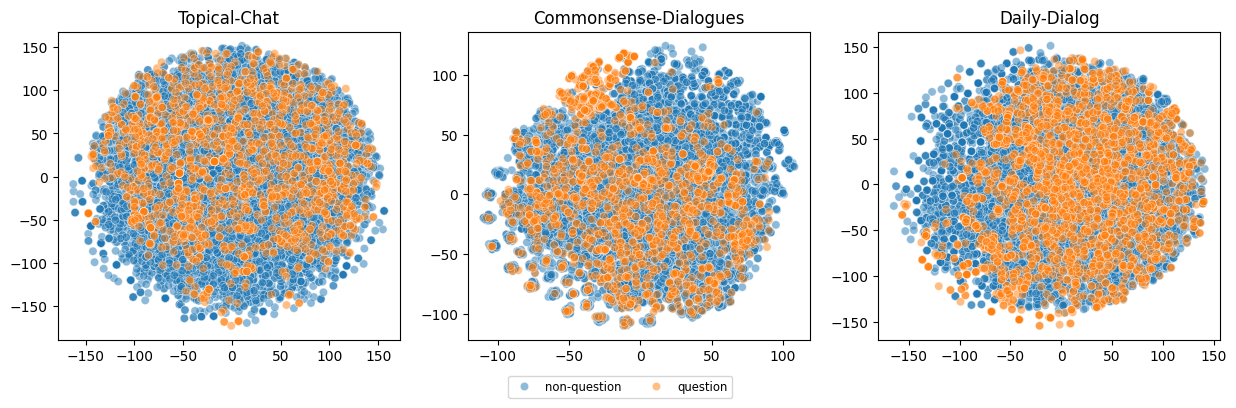

In [34]:
def plot_tsne(data_dir: str, ax=None):

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    
    sentences = load_sentences(Path(data_dir) / 'train.sentences.txt')
    embeddings = load_embeddings(Path(data_dir) / 'train.embeddings.npy')
    tsne_embeddings = load_embeddings(Path(data_dir) / 'train.tsne.npy')

    print(f'Length of sentences: {len(sentences)}')
    print(f'Length of embeddings: {len(embeddings)}')
    print(f'Length of tsne embeddings: {len(tsne_embeddings)}')

    # question_indices = [i for i, s in enumerate(sentences) if '?' in s]

    # build dataframe
    df = pd.DataFrame({'sentence': sentences, 'x': tsne_embeddings[:, 0], 'y': tsne_embeddings[:, 1]})
    # df['question'] = df['sentence'].apply(lambda s: 'question' if '?' in s else 'non-question')    
    df['question'] = df['sentence'].apply(lambda s: 'question' if s.endswith('?') else 'non-question')    

    df = df.sample(10000, random_state=42)

    # sort df by question
    df = df.sort_values('question')

    # plot t-sne scatter plot for questions and non-questions
    sns.scatterplot(data=df, x='x', y='y', hue='question', ax=ax, alpha=0.5)

    ax.legend(loc='upper right')
    ax.set_ylabel('')
    ax.set_xlabel('')

    return ax

def plot_datasets(data_dirs: List[str]):

    fig, axs = plt.subplots(1, len(data_dirs), figsize=(len(data_dirs)*5, 4))
    for i, data_dir in enumerate(data_dirs):
        ax = axs if len(data_dirs) == 1 else axs[i]
        plot_tsne(data_dir, ax=ax)
        ax.set_title(Path(data_dir).parent.name)

    if len(data_dirs) > 1:
        # add shared legend under the plot
        handles, labels = axs[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='lower center', ncol=len(handles), fontsize='small', bbox_to_anchor=(0.5, -0.05))
        # remove the subplot legends
        for ax in axs:
            ax.get_legend().remove()
        
    return fig, axs

data_dirs = [
    '../resources/data/Topical-Chat/KGD',
    '../resources/data/Commonsense-Dialogues/CSD',
    '../resources/data/Daily-Dialog/DD',
]

plot_datasets(data_dirs)